In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import sys


def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=0.5,lines_are_white=True, value_threshold=210):
    """
    Hough transform for lines
    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform
    theta - angles, in radians.
    rhos - rho value. Max size is 2 times the diagonal
    """
    # Rho and Theta init
    thetas = np.deg2rad(np.arange(0, 180,angle_step))
    width, height = img.shape
    
    #delete sky
    img[0:int(width/3),:]=0
    
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)
    img_t=img.copy()
    #img_t[are_edges]=0
    #cv2.imshow('test',img_t)
    #cv2.waitKey(0)

    # Vote in the hough accumulator
    print(len(x_idxs))
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        print(str(i),end='\r')
        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos


In [2]:
#read image
img = cv2.imread('001109.png')
#convert to grey
if img.ndim == 3:
    img_g = rgb2gray(img)
#calcul Hough
accumulator, thetas, rhos = hough_line(img_g)

12616


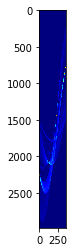

In [3]:
#plot accumulator
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(accumulator, cmap='jet')
ax.set_aspect('equal', adjustable='box')
    

In [4]:
#find peak

from skimage.feature import peak_local_max
max=np.max(accumulator)

#reopen image to be sure it is not a temp image save
img = cv2.imread('001109.png')
# Comparison between image_max and im to find the coordinates of local maxima

coordinates =peak_local_max(accumulator,min_distance=10,threshold_abs =0.8*max)
print('Number of ligne founds:' +str(len(coordinates)))
a = np.cos(thetas)
b=np.sin(thetas)
      
#trace lines
for l in range(len(coordinates)):
    index_rho= coordinates[l][0]
    index_thetas=coordinates[l][1]
    x0=a[index_thetas]*rhos[index_rho]
    y0=b[index_thetas]*rhos[index_rho]
    x1 =int(x0 + 2000*(-b[index_thetas]))
    y1 =int(y0 + 2000*a[index_thetas])
    x2 =int(x0 - 2000*(-b[index_thetas]))
    y2 = int(y0 - 2000*a[index_thetas])
    

    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 5)
#save img  
cv2.imwrite('test.png', img)

Number of ligne founds:6


True